## Making the graphs

In [14]:
import pandas as pd 
import matplotlib.pyplot as plt


In [15]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [16]:
## plot the errors by the methods with a heatmap 
# first get the data
def make_graphs(df, save_data):
  metric_cols = ['NX_NVI','NX_NMI','NX_RAND_IDX','IG_NVI','IG_NMI','IG_RAND_IDX']
  by_method = df.groupby(['METHOD']).mean()[metric_cols]
  by_fn = df.groupby(['FILE_NAME']).mean()[metric_cols]
  by_method_fn = df.groupby(['METHOD','FILE_NAME']).mean()[metric_cols]
  by_nodes = df.groupby(['NUM_NODES']).mean()[metric_cols]
  ## plot the data
  import seaborn as sns 
  ## heatmap with a cmap from green (low values) to red (high values)
  ax = sns.heatmap(by_method, cmap='rocket_r',cbar=True, annot=True, fmt=".2f")
  plt.xlabel('Metrics')
  plt.title("Mean of the metrics by method")
  plt.savefig(save_data+"mean_metrics_method.png" ,bbox_inches='tight')
  plt.show()
  ax = sns.heatmap(by_fn, cmap='rocket_r',cbar=True, annot=True, fmt=".2f")
  plt.xlabel('Metrics')
  plt.title("Mean of the metrics by file")
  plt.savefig(save_data+"mean_metrics_file.png" ,bbox_inches='tight')
  plt.show()
  axs = sns.heatmap(by_method_fn, cmap='rocket_r',cbar=True, annot=True, fmt=".2f")
  plt.xlabel('Metrics')
  plt.title("Mean of the metrics by method and file")
  plt.savefig(save_data+"mean_metrics_method_and_file.png" ,bbox_inches='tight')
  plt.show()
  axs = sns.heatmap(by_nodes, cmap='rocket_r',cbar=True, annot=True, fmt=".2f")
  plt.xlabel('Metrics')
  plt.title("Mean of the metrics by number of nodes")
  plt.savefig(save_data+"mean_metrics_nodes.png" ,bbox_inches='tight')
  plt.show()
  by_method.plot(kind='bar')
  plt.savefig(save_data+"bar_mean_metrics_nodes.png" ,bbox_inches='tight')
  plt.show()
  by_fn.plot(kind='bar')
  plt.savefig(save_data+"_bar_mean_metrics_nodes.png" ,bbox_inches='tight')
  plt.show()

In [21]:
pwd

'/Users/Eric/Documents/Uni/Msc/Courses/Sem2/shared_folders/Complex_Networks/3_Community_detection'

In [31]:
CURR_DIR = "./"
## DATA: CSV FILES 
toy_data = CURR_DIR + "data/model_metrics/toy.csv"
model_data = CURR_DIR + "data/model_metrics/model.csv"
real_data = CURR_DIR + "data/model_metrics/real.csv"
all_data = CURR_DIR + "data/model_metrics/all_models.csv"
## SAVE DATA: PLOTS 
toy_save_data = CURR_DIR + "data/model_metrics/toy/"
model_save_data = CURR_DIR + "data/model_metrics/model/"
real_save_data = CURR_DIR + "data/model_metrics/real/"
main_save_data = CURR_DIR + "data/model_metrics/"

In [10]:
# ## USE THESE IF USING GOOGLE DRIVE 
# toy_data = './drive/MyDrive/Cursos/3_Community_detection/data/model_metrics/toy.csv'
# model_data = './drive/MyDrive/Cursos/3_Community_detection/data/model_metrics/model.csv'
# real_data = './drive/MyDrive/Cursos/3_Community_detection/data/model_metrics/real.csv'
# all_data = './drive/MyDrive/Cursos/3_Community_detection/data/model_metrics/all_models.csv'
# ## save paths for images 
# toy_save_data = './drive/MyDrive/Cursos/3_Community_detection/data/model_metrics/toy/'
# model_save_data = './drive/MyDrive/Cursos/3_Community_detection/data/model_metrics/model/'
# real_save_data = './drive/MyDrive/Cursos/3_Community_detection/data/model_metrics/real/'
# main_save_dir = './drive/MyDrive/Cursos/3_Community_detection/data/model_metrics/'


In [24]:

## dataframes 
df_toy = pd.read_csv(toy_data, index_col=0)
df_model = pd.read_csv(model_data, index_col=0)
df_real = pd.read_csv(real_data, index_col=0)
df_all = pd.read_csv(all_data, index_col=0)

In [25]:
df_all.head()

,MODEL_TYPE,FILE_NAME,NUM_NODES,PARTITION_ID,METHOD,NUM_PARTITIONS,GEN_PARTITION,NX_NVI,NX_NMI,NX_RAND_IDX,IG_NVI,IG_NMI,IG_RAND_IDX,MOD
0,toy,./data/toy/grid-p-6x6.net,36,1,Garvin-Newman,0,False,0.569743,0.427239,0.784127,0.440792,0.494979,0.765079,0.416667
1,toy,./data/toy/grid-p-6x6.net,36,1,Greedy,0,False,0.569743,0.427239,0.784127,0.268858,0.738256,0.879365,0.416667
2,toy,./data/toy/grid-p-6x6.net,36,1,Label-Propagation,0,False,0.567597,0.296286,0.638095,0.494732,0.000000,0.149206,0.345679
3,model,./data/model/rb125.net,125,1,Garvin-Newman,3,True,0.215205,0.808948,0.912387,0.199386,0.825443,0.918839,0.616897
4,model,./data/model/rb125.net,125,1,Greedy,3,True,0.215205,0.808948,0.912387,0.116178,0.905196,0.944645,0.616897


In [28]:
## NX & IG METRICS
nx_metric_cols = ['NX_NVI','NX_NMI','NX_RAND_IDX']
ig_metric_cols = ['IG_NVI','IG_NMI','IG_RAND_IDX']
metric_cols = nx_metric_cols + ig_metric_cols
## filter the dataframe 
a = df_all.groupby(['MODEL_TYPE','METHOD']).mean()[nx_metric_cols]#.reset_index().drop(['MODEL_TYPE','METHOD'],axis=1)
b = df_all.groupby(['MODEL_TYPE','METHOD']).mean()[ig_metric_cols]#.reset_index().drop(['MODEL_TYPE','METHOD'],axis=1)
## make a new dataframe 
new_cols = ["MODEL_TYPE","METHOD",'DIFF_NVI', 'DIFF_NMI', 'DIFF_RAND_IDX']
df = pd.DataFrame(columns=new_cols)
df['MODEL_TYPE'] = a.reset_index()['MODEL_TYPE']
df['METHOD'] = a.reset_index()['METHOD']
## calculate the difference 
diff = abs((b.values - a.values))
## fill the values 
df[['DIFF_NVI','DIFF_NMI','DIFF_RAND_IDX']] = diff
df.to_csv("./data/model_metrics/diff_metrics.csv")

In [29]:
## AVERAGE OF BOTH
## make a new dataframe 
new_cols = ["MODEL_TYPE","METHOD",'AVG_NVI','AVG_NMI','AVG_RAND_IDX','MOD']
df = pd.DataFrame(columns=new_cols)
df['MODEL_TYPE'] = a.reset_index()['MODEL_TYPE']
df['METHOD'] = a.reset_index()['METHOD']
## calculate the difference 
import numpy as np 
import pandas as pd 
avg = (b.values + a.values) / 2
## fill the values 
df[['AVG_NVI','AVG_NMI','AVG_RAND_IDX']] = avg
df.to_csv("./data/model_metrics/avg_metrics.csv")

In [ ]:
df_all.groupby(['METHOD'])[metric_cols].mean()

In [ ]:
df_all.groupby(['NUM_NODES'])[ig_metric_cols].mean().plot(kind='bar',title='Metrics by Number of Nodes',
                                                          ylabel='Average Metric Value',
                                                          figsize=(20,12))
plt.savefig("./data/model_metrics/metrics_by_nodes.png")
plt.show()

In [ ]:
sns.heatmap(df_all.groupby(['NUM_NODES'])[metric_cols].mean(), cmap='rocket_r',cbar=True, annot=True, fmt=".2f")

In [ ]:
df.groupby(['METHOD']).mean().plot(kind='bar', title='Metrics by Method',
                                   ylabel='Average Metric Value',
                                   figsize=(15,8))
plt.savefig("data/model_metrics/imgs_to_use/barplot_metrics_by_method.png")
plt.show()

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
g = sns.heatmap(df.groupby(['METHOD']).mean(), cmap='rocket_r',cbar=True, annot=True, fmt=".2f")
g.set_title("Metrics by Method")
plt.savefig("./data/model_metrics/heatmap_difference_metrics_by_method.png")
plt.show()


In [ ]:
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
g = df.groupby(['METHOD']).mean()
ax = sns.heatmap(g, cmap='rocket_r',cbar=True, annot=True, fmt=".2f")
plt.title("Mean of the metrics by method")
plt.savefig("./data/model_metrics/heatmap_mean_metrics_by_method.png")
plt.show()

In [ ]:
## plot
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
g = df.groupby(['MODEL_TYPE','METHOD']).mean()
ax = sns.heatmap(g, cmap='rocket_r',cbar=True, annot=True, fmt=".2f")
ax.set_title("Difference between NetworkX and iGraph metrics (%)")
plt.show()

In [ ]:
df_all.groupby(['MODEL_TYPE']).mean()[metric_cols].plot(kind='bar')

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
aa = df_all.groupby(['METHOD']).mean()[metric_cols]
ax = sns.heatmap(aa, cmap='rocket_r',cbar=True, annot=True, fmt=".2f")
plt.title("Mean of the metrics by method and Library")
plt.savefig("./data/model_metrics/heatmap_mean_metrics_by_method_and_library.png")
plt.show()

In [ ]:
g = df.groupby(['METHOD']).mean()
ax = sns.heatmap(g, cmap='rocket_r',cbar=True, annot=True, fmt=".2f")
ax.set_title("Difference between NetworkX and iGraph metrics (%)")
plt.show()

In [ ]:
import seaborn as sns 
ax = sns.heatmap(diff, cmap='rocket_r',cbar=True, annot=True, fmt=".2f")
plt.show()

In [ ]:
a.values - b.values 

In [ ]:
## see a heatmap by the different models 

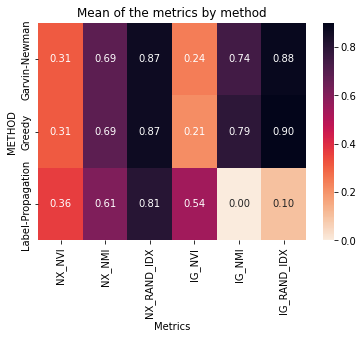

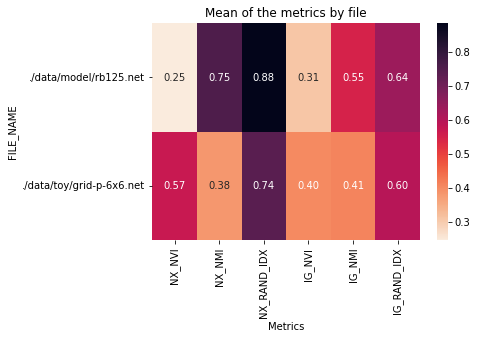

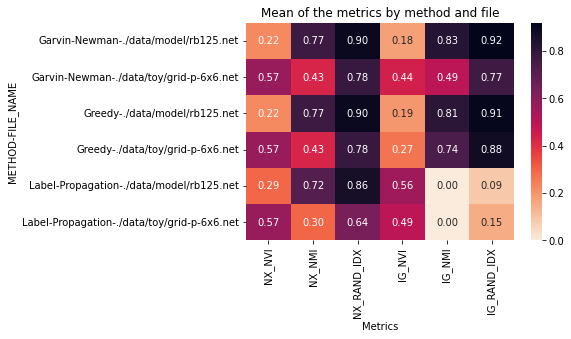

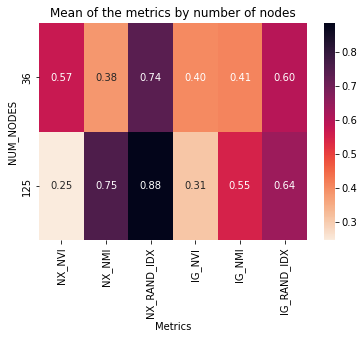

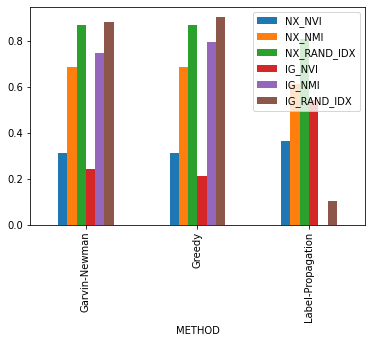

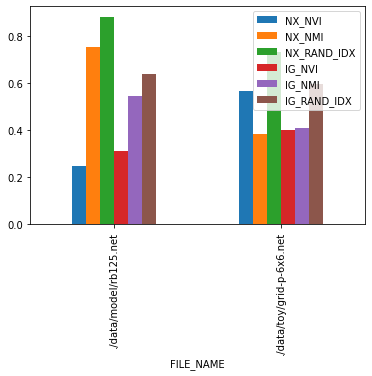

In [33]:
make_graphs(df_all, main_save_data)

In [ ]:
make_graphs(df_toy, toy_save_data)

In [ ]:
make_graphs(df_model, model_save_data)

In [ ]:
make_graphs(df_real, real_save_data)

In [ ]:
metric_cols = ['NX_NVI','NX_NMI','NX_RAND_IDX','IG_NVI','IG_NMI','IG_RAND_IDX']
df_all.groupby(['MODEL_TYPE','METHOD']).mean()[metric_cols].plot(kind='bar',title='Model Type & Method by Metrics')

In [ ]:
from pylab import rcParams
import seaborn as sns
rcParams['figure.figsize'] = (20,12)
g = df_all.groupby(['MODEL_TYPE']).mean()[metric_cols]
ax = sns.heatmap(g, annot=True)
plt.show()
ax.set_title("All Models & Metrics")
ax.set_xlabel("Metric")
plt.savefig(main_save_dir+"_heatmap_all_modeltype_metrics.png")

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = (20,12)
g = df_all.groupby(['MODEL_TYPE']).mean()[metric_cols].plot(kind='bar')
#ax = sns.heatmap(g, annot=True)
plt.title("All Models & Metrics")
plt.xlabel("Metric")
plt.savefig(main_save_dir+"_barall_modeltype_metrics.png")